In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from wordcloud import WordCloud

In [4]:
import pandas as pd

data = pd.read_csv(r"C:\Users\91945\Downloads\netflix1.csv")
print(data.head())  # To display the first 5 rows


  show_id     type                             title         director  \
0      s1    Movie              Dick Johnson Is Dead  Kirsten Johnson   
1      s3  TV Show                         Ganglands  Julien Leclercq   
2      s6  TV Show                     Midnight Mass    Mike Flanagan   
3     s14    Movie  Confessions of an Invisible Girl    Bruno Garotti   
4      s8    Movie                           Sankofa     Haile Gerima   

         country date_added  release_year rating  duration  \
0  United States  9/25/2021          2020  PG-13    90 min   
1         France  9/24/2021          2021  TV-MA  1 Season   
2  United States  9/24/2021          2021  TV-MA  1 Season   
3         Brazil  9/22/2021          2021  TV-PG    91 min   
4  United States  9/24/2021          1993  TV-MA   125 min   

                                           listed_in  
0                                      Documentaries  
1  Crime TV Shows, International TV Shows, TV Act...  
2                 TV Dr

In [5]:
data.shape

(8790, 10)

In [6]:
 data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [7]:
 data.describe(include='all')

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
count,8790,8790,8790,8790,8790,8790,8790.000000,8790,8790,8790
unique,8790,2,8787,4528,86,1713,NaN,14,220,513
top,s8786,Movie,9-Feb,Not Given,United States,1/1/2020,NaN,TV-MA,1 Season,"Dramas, International Movies"
freq,1,6126,2,2588,3240,110,NaN,3205,1791,362
mean,NaN,NaN,NaN,NaN,NaN,NaN,2014.183163,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,8.825466,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN


In [8]:
data.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [9]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

In [10]:
data[['rating']].value_counts()

rating  
TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64

In [11]:
 data.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

In [15]:
# Convert specific columns to lowercase
data['type'] = data['type'].str.lower()
data['country'] = data['country'].str.lower()
data['rating'] = data['rating'].str.lower()
data['director'] = data['director'].str.lower()
data['listed_in'] = data['listed_in'].str.lower()

# Capitalize column names properly
new_column_names = []
for i in data.columns:
    new_column_names.append(i.capitalize())

data.columns = new_column_names  # Move this outside the loop

# Display updated column names
print(data.columns)


Index(['Show_id', 'Type', 'Title', 'Director', 'Country', 'Date_added',
       'Release_year', 'Rating', 'Duration', 'Listed_in'],
      dtype='object')


In [17]:
data['Date_added'] = pd.to_datetime(data['Date_added'], 
errors='coerce')
data['Duration'] = data['Duration'].apply(lambda x: int(x.split()[0]) 
if 'min' in x else int(x.split()[0])*30) 
# Assuming 1 season = 30 mins for simplicity
data.head()

,Show_id,Type,Title,Director,Country,Date_added,Release_year,Rating,Duration,Listed_in
0,s1,movie,Dick Johnson Is Dead,kirsten johnson,united states,2021-09-25,2020,pg-13,90,documentaries
1,s3,tv show,Ganglands,julien leclercq,france,2021-09-24,2021,tv-ma,30,"crime tv shows, international tv shows, tv act..."
2,s6,tv show,Midnight Mass,mike flanagan,united states,2021-09-24,2021,tv-ma,30,"tv dramas, tv horror, tv mysteries"
3,s14,movie,Confessions of an Invisible Girl,bruno garotti,brazil,2021-09-22,2021,tv-pg,91,"children & family movies, comedies"
4,s8,movie,Sankofa,haile gerima,united states,2021-09-24,1993,tv-ma,125,"dramas, independent movies, international movies"


In [18]:
data.duplicated().sum()

np.int64(0)

In [19]:
 data.drop_duplicates(inplace=True)
 data.isna().sum()

Show_id         0
Type            0
Title           0
Director        0
Country         0
Date_added      0
Release_year    0
Rating          0
Duration        0
Listed_in       0
dtype: int64

In [20]:
data['Show_id'].unique()

array(['s1', 's3', 's6', ..., 's8801', 's8784', 's8786'],
      shape=(8790,), dtype=object)

In [21]:
data['Show_id']=data['Show_id'].apply(lambda x:x.split('s')[1])
type(data['Show_id'][0])
str
type(data['Show_id'][0])
str
data['Show_id']=data['Show_id'].astype(int)
data.head()

,Show_id,Type,Title,Director,Country,Date_added,Release_year,Rating,Duration,Listed_in
0,1,movie,Dick Johnson Is Dead,kirsten johnson,united states,2021-09-25,2020,pg-13,90,documentaries
1,3,tv show,Ganglands,julien leclercq,france,2021-09-24,2021,tv-ma,30,"crime tv shows, international tv shows, tv act..."
2,6,tv show,Midnight Mass,mike flanagan,united states,2021-09-24,2021,tv-ma,30,"tv dramas, tv horror, tv mysteries"
3,14,movie,Confessions of an Invisible Girl,bruno garotti,brazil,2021-09-22,2021,tv-pg,91,"children & family movies, comedies"
4,8,movie,Sankofa,haile gerima,united states,2021-09-24,1993,tv-ma,125,"dramas, independent movies, international movies"


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Show_id       8790 non-null   int64         
 1   Type          8790 non-null   object        
 2   Title         8790 non-null   object        
 3   Director      8790 non-null   object        
 4   Country       8790 non-null   object        
 5   Date_added    8790 non-null   datetime64[ns]
 6   Release_year  8790 non-null   int64         
 7   Rating        8790 non-null   object        
 8   Duration      8790 non-null   int64         
 9   Listed_in     8790 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 686.8+ KB


In [23]:
data.to_csv('Cleaned_Data',index=False)
df=pd.read_csv('Cleaned_Data')
df.head()

,Show_id,Type,Title,Director,Country,Date_added,Release_year,Rating,Duration,Listed_in
0,1,movie,Dick Johnson Is Dead,kirsten johnson,united states,2021-09-25,2020,pg-13,90,documentaries
1,3,tv show,Ganglands,julien leclercq,france,2021-09-24,2021,tv-ma,30,"crime tv shows, international tv shows, tv act..."
2,6,tv show,Midnight Mass,mike flanagan,united states,2021-09-24,2021,tv-ma,30,"tv dramas, tv horror, tv mysteries"
3,14,movie,Confessions of an Invisible Girl,bruno garotti,brazil,2021-09-22,2021,tv-pg,91,"children & family movies, comedies"
4,8,movie,Sankofa,haile gerima,united states,2021-09-24,1993,tv-ma,125,"dramas, independent movies, international movies"


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_id       8790 non-null   int64 
 1   Type          8790 non-null   object
 2   Title         8790 non-null   object
 3   Director      8790 non-null   object
 4   Country       8790 non-null   object
 5   Date_added    8790 non-null   object
 6   Release_year  8790 non-null   int64 
 7   Rating        8790 non-null   object
 8   Duration      8790 non-null   int64 
 9   Listed_in     8790 non-null   object
dtypes: int64(3), object(7)
memory usage: 686.8+ KB


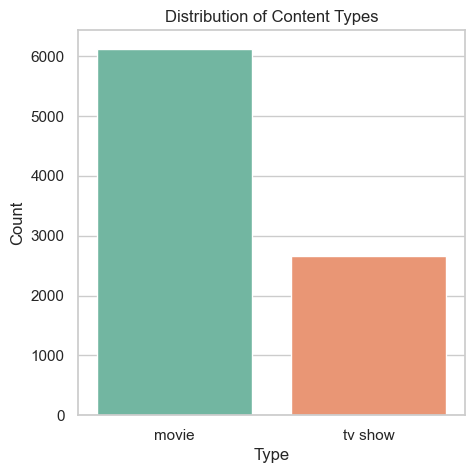

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Count values
content_counts = df['Type'].value_counts()

# Prepare DataFrame for plotting
plot_df = pd.DataFrame({
    'Type': content_counts.index,
    'Count': content_counts.values
})

# Plot using hue (so palette can apply)
plt.figure(figsize=(5, 5))
sns.barplot(data=plot_df, x='Type', y='Count', hue='Type', palette='Set2', legend=False)

plt.title('Distribution of Content Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


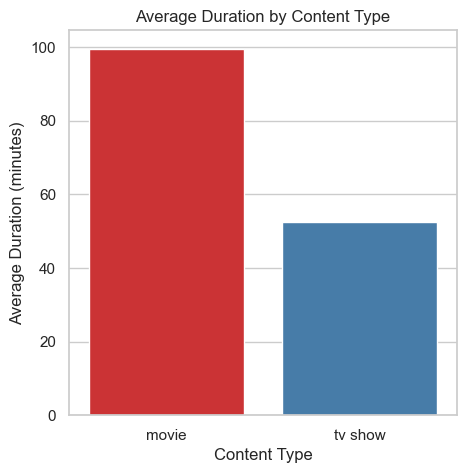

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the average duration for each content type
avg_duration = df.groupby('Type')['Duration'].mean().reset_index()

# Plot the average durations
plt.figure(figsize=(5, 5))
sns.barplot(data=avg_duration, x='Type', y='Duration', hue='Type', palette='Set1', legend=False)

plt.title('Average Duration by Content Type')
plt.xlabel('Content Type')
plt.ylabel('Average Duration (minutes)')
plt.show()


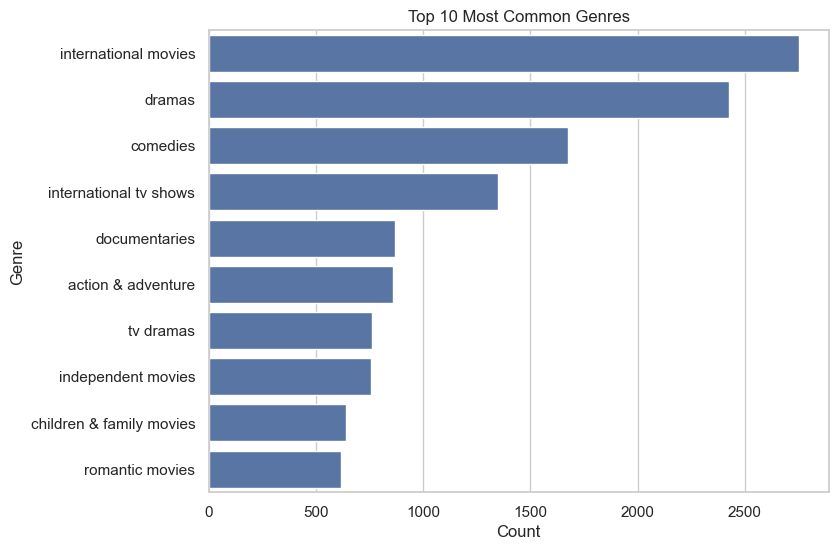

In [35]:
df['Listed_in'] = df['Listed_in'].apply(lambda x: x.split(', ') if pd.notnull(x) else [])

# Step 2: Explode the genre list into multiple rows
df_exploded = df.explode('Listed_in')

# Step 3: Remove empty strings if any
df_exploded = df_exploded[df_exploded['Listed_in'] != '']

# Step 4: Count the top 10 most common genres
genre_counts = df_exploded['Listed_in'].value_counts().head(10)

# Step 5: Plot the top 10 genres
plt.figure(figsize=(8, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index)

plt.title('Top 10 Most Common Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

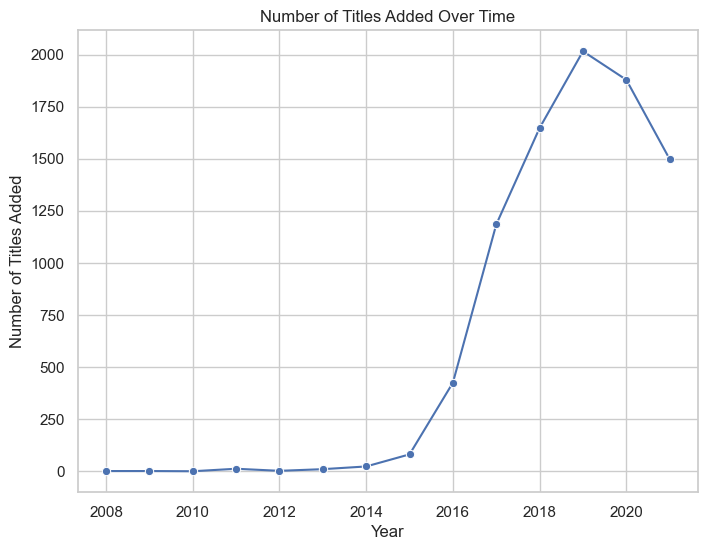

In [36]:
df['Date_added'] = pd.to_datetime(df['Date_added'], errors='coerce')

# Step 2: Extract the year into a new column
df['Year_added'] = df['Date_added'].dt.year

# Step 3: Count the number of titles added each year
titles_added = df['Year_added'].value_counts().sort_index()

# Step 4: Plot the number of titles added over time
plt.figure(figsize=(8, 6))
sns.lineplot(x=titles_added.index, y=titles_added.values, marker='o', color='b')

plt.title('Number of Titles Added Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Titles Added')
plt.show()

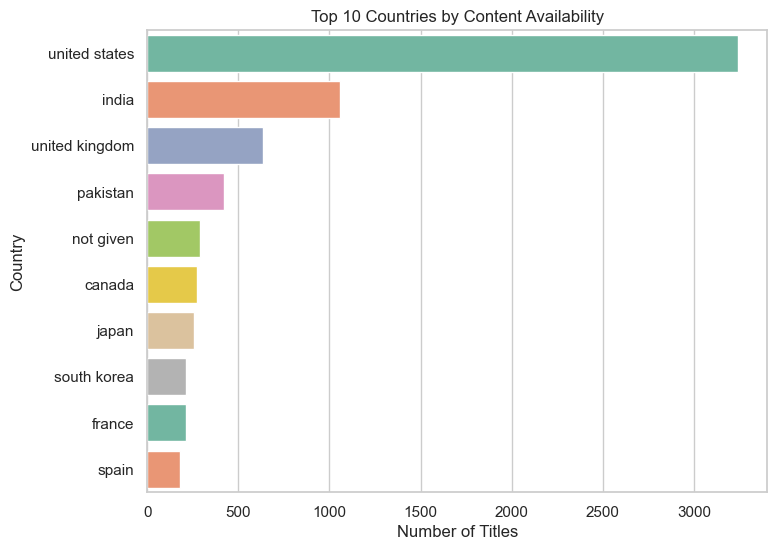

In [37]:
country_counts = df['Country'].value_counts().head(10)

# Prepare DataFrame for plotting with hue
plot_df = country_counts.reset_index()
plot_df.columns = ['Country', 'Count']

# Plot the top 10 countries with hue set to 'Country'
plt.figure(figsize=(8, 6))
sns.barplot(
    data=plot_df,
    x='Count',
    y='Country',
    hue='Country',
    palette='Set2',
    legend=False
)

plt.title('Top 10 Countries by Content Availability')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

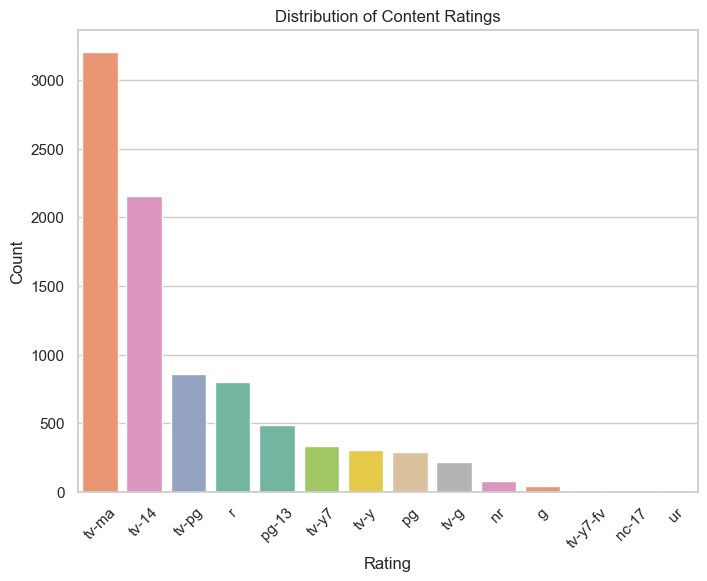

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each rating
rating_counts = df['Rating'].value_counts()

# Plot the distribution of ratings with hue set to 'Rating' to use palette properly
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Rating', hue='Rating', palette='Set2', order=rating_counts.index, legend=False)

plt.title('Distribution of Content Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


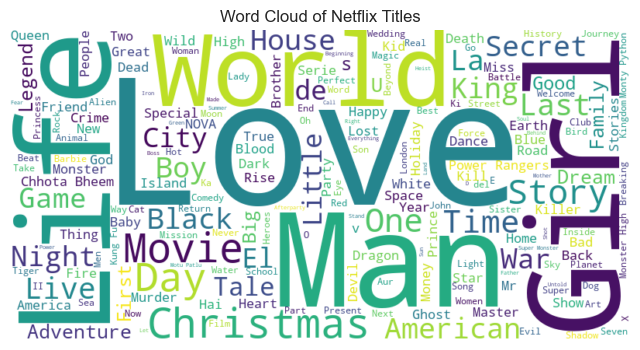

In [42]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all titles into a single string
text = ' '.join(df['Title'].dropna())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Netflix Titles')
plt.show()
